In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [3]:
from math import sqrt

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
dataset = pd.read_csv("XRP_price.csv",header = 0,
                      infer_datetime_format = True,
                      parse_dates = ["Date"],index_col = ["Date"])

In [10]:
dataset

,Close XRP,Volume XRP,Market Cap XRP
Date,,,
2013-08-05,0.005613,NaN,43879157
2013-08-06,0.004680,NaN,36591008
2013-08-07,0.004417,NaN,34534121
2013-08-08,0.004254,NaN,33258632
2013-08-09,0.004291,NaN,33547503
...,...,...,...
2018-12-12,0.307323,370325300.0,12577803841
2018-12-13,0.300026,303413883.0,12279148093
2018-12-14,0.288790,320266797.0,11819314866


In [11]:
dataset.fillna(0,inplace = True)

In [13]:
dataset = dataset.astype('float32')

In [14]:
count_yearly_days = dataset["Close XRP"].resample("Y").count()

In [15]:
print(count_yearly_days)

Date
2013-12-31    149
2014-12-31    365
2015-12-31    365
2016-12-31    366
2017-12-31    365
2018-12-31    350
Freq: A-DEC, Name: Close XRP, dtype: int64


In [16]:
# summarize dataset
print("Shape of the dataset :", dataset.shape)
print()
print("First rows of the dataset :", dataset.head())
print()
print("Statistics on the dataset :",dataset.describe())

Shape of the dataset : (1960, 3)

First rows of the dataset :             Close XRP  Volume XRP  Market Cap XRP
Date                                             
2013-08-05   0.005613         0.0      43879156.0
2013-08-06   0.004680         0.0      36591008.0
2013-08-07   0.004417         0.0      34534120.0
2013-08-08   0.004254         0.0      33258632.0
2013-08-09   0.004291         0.0      33547504.0

Statistics on the dataset :          Close XRP    Volume XRP  Market Cap XRP
count  1960.000000  1.960000e+03    1.960000e+03
mean      0.164995  2.000525e+08    6.352879e+09
std       0.341782  6.846500e+08    1.334716e+10
min       0.002810  0.000000e+00    2.196991e+07
25%       0.006315  2.744888e+05    1.735673e+08
50%       0.008615  9.076330e+05    2.580457e+08
75%       0.211142  1.335985e+08    8.117047e+09
max       3.380000  9.110440e+09    1.308535e+11


In [18]:
values = dataset.values

In [20]:
series = pd.Series(values[:,0])
series.index = dataset.index
series.index.name = "Date"

In [24]:
dataset.head()

,Close XRP,Volume XRP,Market Cap XRP
Date,,,
2013-08-05,0.005613,0.0,43879156.0
2013-08-06,0.004680,0.0,36591008.0
2013-08-07,0.004417,0.0,34534120.0
2013-08-08,0.004254,0.0,33258632.0
2013-08-09,0.004291,0.0,33547504.0


In [23]:
groups = series['2013':'2018'].groupby(pd.Grouper(freq='Y'))

In [26]:
for name,groups in groups:
    

2013-12-31 00:00:00 Date
2013-08-05    0.005613
2013-08-06    0.004680
2013-08-07    0.004417
2013-08-08    0.004254
2013-08-09    0.004291
                ...   
2013-12-27    0.027076
2013-12-28    0.027303
2013-12-29    0.027218
2013-12-30    0.027460
2013-12-31    0.027330
Length: 149, dtype: float32
2014-12-31 00:00:00 Date
2014-01-01    0.026944
2014-01-02    0.028726
2014-01-03    0.027627
2014-01-04    0.028129
2014-01-05    0.025230
                ...   
2014-12-27    0.024074
2014-12-28    0.023764
2014-12-29    0.024231
2014-12-30    0.024200
2014-12-31    0.024438
Length: 365, dtype: float32
2015-12-31 00:00:00 Date
2015-01-01    0.024390
2015-01-02    0.024318
2015-01-03    0.022106
2015-01-04    0.018928
2015-01-05    0.020316
                ...   
2015-12-27    0.006343
2015-12-28    0.006340
2015-12-29    0.006264
2015-12-30    0.006182
2015-12-31    0.006040
Length: 365, dtype: float32
2016-12-31 00:00:00 Date
2016-01-01    0.005955
2016-01-02    0.006065
2016-01-03 

In [40]:
groups = series["2013":"2018"].groupby(pd.Grouper(freq = "Y"))
year_df = []

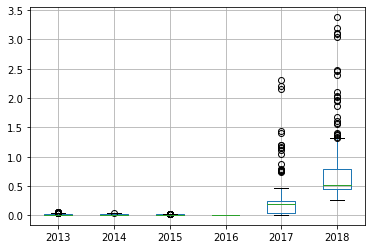

In [41]:
for name,groups in groups:
    df = pd.DataFrame()
    df[name.year] = groups.values
    year_df.append(df)
years = pd.concat(years_df,axis = 1,sort = False)
years.boxplot()
plt.show()
        


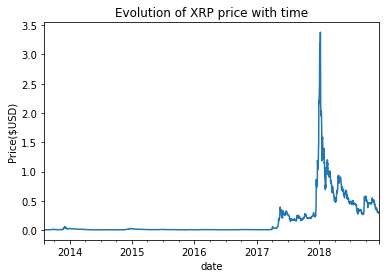

In [42]:
series.plot()
plt.ylabel("Price($USD)")
plt.xlabel("date")
plt.title("Evolution of XRP price with time")
plt.show()

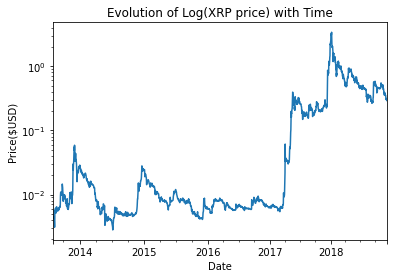

In [43]:
series.plot(loglog = True)
plt.xlabel("Date")
plt.ylabel("Price($USD)")
plt.title('Evolution of Log(XRP price) with Time')
plt.show()

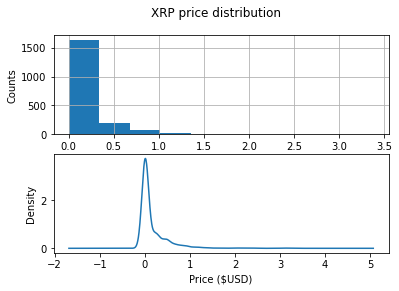

In [44]:
plt.figure()
plt.suptitle('XRP price distribution')
plt.subplot(211)
plt.xlabel('Price ($USD)')
plt.ylabel('Counts')
series.hist()
plt.subplot(212)
plt.xlabel('Price ($USD)')
series.plot(kind='kde')
plt.show()

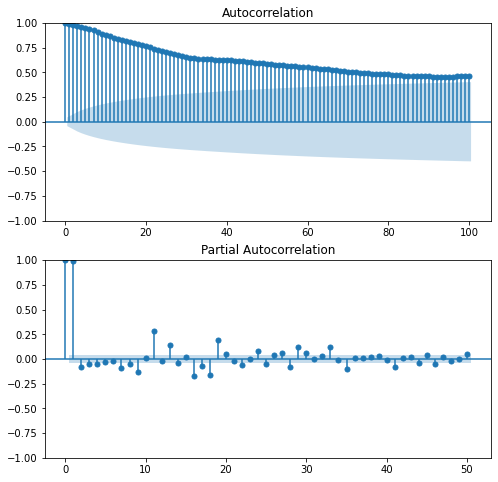

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8))
plot_acf(series, lags =100, ax = ax1)
plot_pacf(series, lags =50, ax = ax2)
plt.show()

In [46]:
result = adfuller(series)

In [48]:
print("ADF-statistic:",result[0])
print("p-value:",result[1])
print("critical-value")
for key,value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF-statistic: -3.1228260165185793
p-value: 0.02490943328849482
critical-value
	1%:-3.434
	5%:-2.863
	10%:-2.568


In [54]:
def split_dataset(data,n_test):
    train,test = data[0:-n_test],data[-n_test:]
    train = np.array(np.split(train,len(train)/7))
    test = np.array(np.split(test,len(test)/7))
    return train,test
n_test = 714
train,test = split_dataset(values,n_test)
print("Training dataset shape :",train.shape)
print("First row :",train[0,0,:],";Last row :",train[-1,-1,:])
print("Testing dataset shape:",test.shape)
print("First row:",test[0,0,:],";Last row:",test[-1,-1,:])

Training dataset shape : (178, 7, 3)
First row : [5.6130001e-03 0.0000000e+00 4.3879156e+07] ;Last row : [6.3680001e-03 4.1897800e+05 2.3140864e+08]
Testing dataset shape: (102, 7, 3)
First row: [6.311000e-03 1.046250e+06 2.293127e+08] ;Last row: [2.8792900e-01 3.1613594e+08 1.1784051e+10]


In [59]:
train[0:11]

array([[[5.61300013e-03, 0.00000000e+00, 4.38791560e+07],
        [4.67999978e-03, 0.00000000e+00, 3.65910080e+07],
        [4.41699987e-03, 0.00000000e+00, 3.45341200e+07],
        [4.25399980e-03, 0.00000000e+00, 3.32586320e+07],
        [4.29099984e-03, 0.00000000e+00, 3.35475040e+07],
        [4.31399979e-03, 0.00000000e+00, 3.37249680e+07],
        [4.41499986e-03, 0.00000000e+00, 3.45184840e+07]],

       [[4.44900012e-03, 0.00000000e+00, 3.47781960e+07],
        [4.24499996e-03, 0.00000000e+00, 3.31903040e+07],
        [3.78799997e-03, 0.00000000e+00, 2.96174500e+07],
        [3.09200003e-03, 0.00000000e+00, 2.41726800e+07],
        [3.13400012e-03, 0.00000000e+00, 2.44975140e+07],
        [5.67100011e-03, 0.00000000e+00, 4.43353320e+07],
        [5.61700016e-03, 0.00000000e+00, 4.39165280e+07]],

       [[5.26000001e-03, 0.00000000e+00, 4.11253040e+07],
        [6.09799987e-03, 0.00000000e+00, 4.76738840e+07],
        [6.13099989e-03, 0.00000000e+00, 4.79287440e+07],
        [5

In [ ]:
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [ ]:
#Summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: Total RMSE --> [%.3f]; Daily RMSE: %s' % (name, score, s_scores))

In [60]:
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: Total RMSE --> [%.3f]; Daily RMSE: %s' % (name, score, s_scores))
def evaluate_model(model_func, train, test, *args):
    #history of weekly data
    history = [x for x in train]
    #walk forward validation
    predictions = list()
    for i in range(len(test)):
    #weekly prediction
        y_hat_seq = model_func(history, *args)
    #store the preditions
        predictions.append(y_hat_seq)
    #update history data
        history.append(test[i,:])
    predictions = np.array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores, predictions#Summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: Total RMSE --> [%.3f]; Daily RMSE: %s' % (name, score, s_scores))
def to_series(data):
    # extract just the price of XRP from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = np.array(series).flatten()
    return series
series = to_series(history)
# define the model
model = ARIMA(series, order=arima_order)
# fit the model
model_fit = model.fit(disp=False)

def arima_forecast(history, arima_order):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = ARIMA(series, order=arima_order)
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat
def Sarima_forecast(history, config):
    order, sorder, trend = config
    # convert history into a univariate series
    series = to_series(history)
    # define model
    model = SARIMAX(series, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat

# define the names and functions for the models we wish to evaluate
models = dict()
models['arima'] = arima_forecast
models['Sarima'] = Sarima_forecast

# define both parameters for the 2 models
arima_order = (1,0,0)
config_sarima = (0,1,0),(0,0,0,0),'n'

# list creation to store the parameters
orders = list()
orders.extend([arima_order, config_sarima])

# list containing the days of the week for plot on a particular day
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'sun']

def evaluate_algorithms(models, orders):
    prediction_simulations = list()
    for (name, func), order in zip(models.items(), orders): # loop on dictionary items and list orders at same time
        # evaluate and get scores
        score, scores, predictions = evaluate_model(func, train, test, order)
        # summarize scores
        summarize_scores(name, score, scores)
        # plot scores
        plt.plot(days, scores, marker='o', label=name)
        # append the simulation results in a list
        prediction_simulations.append(predictions)
    # plot properties and showing
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    return prediction_simulations